In [1]:
%load_ext autoreload
%autoreload 2

import torch
from PIL import Image, ImageDraw

import sys
sys.path.append('..')

from kandinsky3 import  get_T5encoder, get_movq, get_inpainting_unet
from kandinsky3 import  Kandinsky3InpaintingPipeline


libgomp: Invalid value for environment variable OMP_NUM_THREADS

libgomp: Invalid value for environment variable OMP_NUM_THREADS


In [2]:
device = torch.device('cuda:1')

In [3]:
inpainting_unet, null_embedding, projections_state_dict = get_inpainting_unet(
    device,
    '/home/jovyan/afilatov/saved_models/inp_v1/checkpoints/ema_step=200000',
    fp16=False
)

In [4]:
processor, condition_encoders = get_T5encoder(
    device,
    '/home/jovyan/vladimir/imagen/kandinsky3/pretrained_encoders/flan_ul2', 
    projections_state_dict
)

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [5]:
movq = get_movq(
    device,
    '/home/jovyan/vladimir/imagen/kandinsky3/pretrained_encoders/movq/movq.pt',
    fp16=False
)

### Inpainting

In [27]:
inpainting_pipe = Kandinsky3InpaintingPipeline(
    device, inpainting_unet, null_embedding, processor, condition_encoders, movq, fp16=False
)

In [7]:
import numpy as np

w, h = 768, 768
shape = [(200, 100), (500, 700)] 
  
# creating new Image object 
mask_image = Image.new("L", (w, h)) 
  
# create rectangle image 
img1 = ImageDraw.Draw(mask_image)   
img1.rectangle(shape, fill ="#ffffff")

mask = np.array(mask_image) // 255

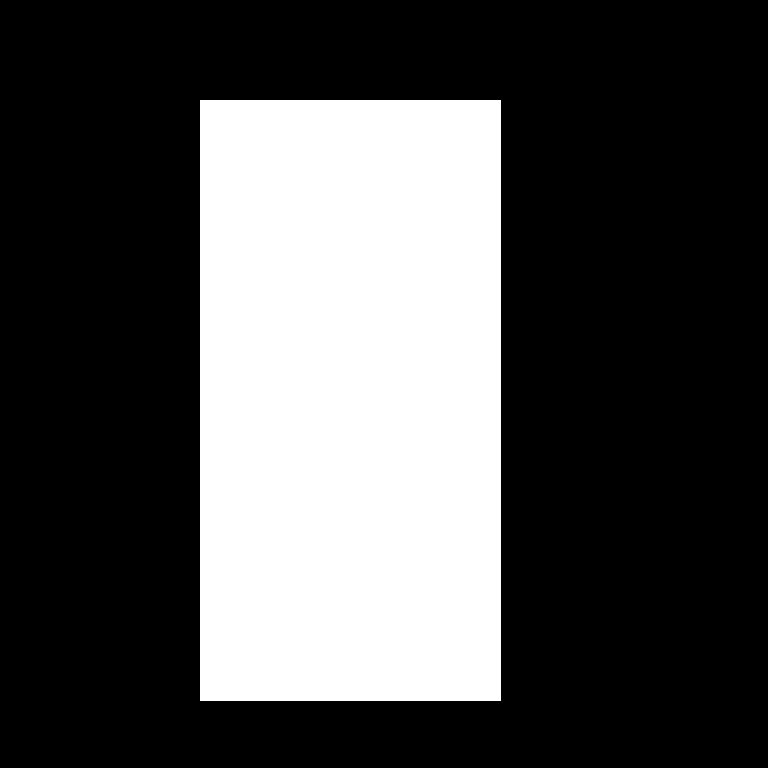

In [53]:
mask_image

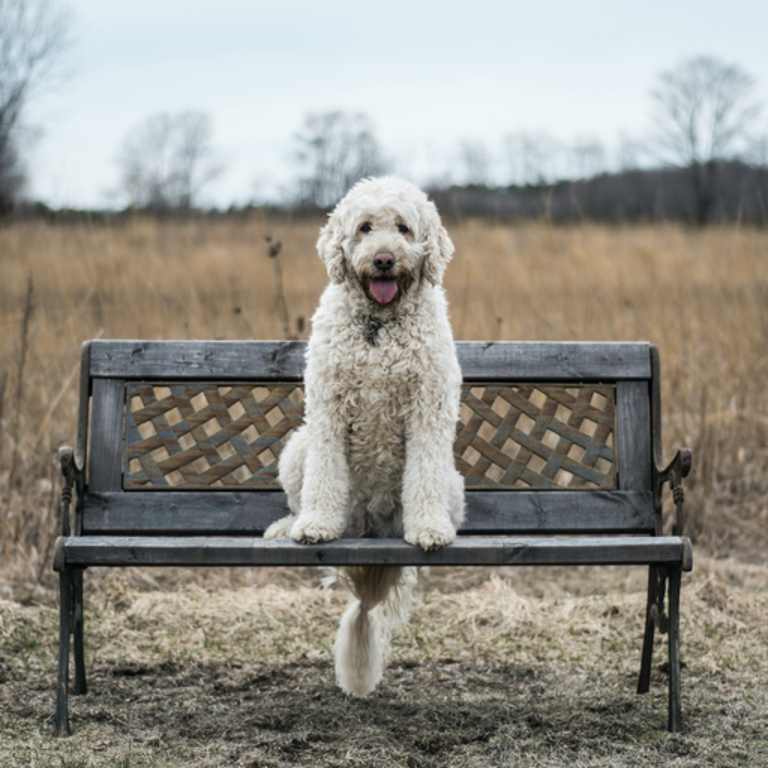

In [55]:
import requests
from io import BytesIO

def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"

image = download_image(img_url).resize((768, 768))
image

In [56]:
res = inpainting_pipe("cheburashka sitting on a bench", image, mask)

100%|██████████| 50/50 [00:07<00:00,  6.36it/s]


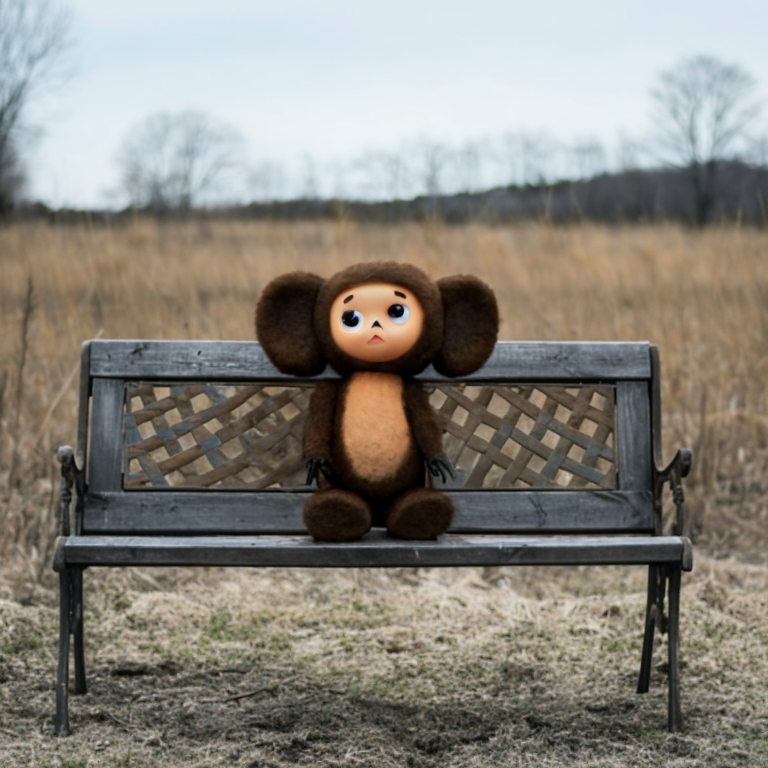

In [57]:
res[0]